In [1]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = 'C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Airplanes Project\\flights.csv'  # Replace with the actual file path
# Assuming the dataset is in a CSV file format, adjust the read function for other formats
df = pd.read_csv(file_path)

# List of columns to keep
desired_columns = [
    "SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "DEPARTURE_DELAY",
    "TAXI_OUT", "WHEELS_OFF", "SCHEDULED_TIME", "ELAPSED_TIME",
    "AIR_TIME", "DISTANCE", "WHEELS_ON", "TAXI_IN", "SCHEDULED_ARRIVAL",
    "ARRIVAL_TIME", "ARRIVAL_DELAY", "DIVERTED", "CANCELLED"
]

# Selecting only the desired columns
selected_data = df[desired_columns]


C:\Users\OMOLP094\AppData\Local\Temp\ipykernel_14240\1527074041.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
selected_data.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [4]:
selected_data.shape

(5819079, 16)

In [5]:
# Count the number of NAN and different values in each column
def count_NA_levels(data):
    for i in data.columns:
        x = data[i].unique()
        y = data[i]
        count_na = data.shape[0] - (y.dropna(axis=0, how='any')).shape[0]
        if count_na > 0:
            print(i + '({} NaN): '.format(count_na) + str(len(x)))
        else:
            print(i + '(no NaN): ' + str(len(x)))

In [6]:
count_NA_levels(selected_data)

SCHEDULED_DEPARTURE(no NaN): 1321
DEPARTURE_TIME(86153 NaN): 1441
DEPARTURE_DELAY(86153 NaN): 1218
TAXI_OUT(89047 NaN): 185
WHEELS_OFF(89047 NaN): 1441
SCHEDULED_TIME(6 NaN): 551
ELAPSED_TIME(105071 NaN): 713
AIR_TIME(105071 NaN): 676
DISTANCE(no NaN): 1363
WHEELS_ON(92513 NaN): 1441
TAXI_IN(92513 NaN): 186
SCHEDULED_ARRIVAL(no NaN): 1435
ARRIVAL_TIME(92513 NaN): 1441
ARRIVAL_DELAY(105071 NaN): 1241
DIVERTED(no NaN): 2
CANCELLED(no NaN): 2


In [8]:
selected_data_clean = selected_data.dropna(axis=0, how='any', 
                                  subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [9]:
selected_data_clean.shape

(5714008, 16)

In [10]:
# Display the first few rows to understand the structure
print("First few rows of the dataset:")
print(selected_data_clean.head())

First few rows of the dataset:
   SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  \
0                    5          2354.0            -11.0      21.0        15.0   
1                   10             2.0             -8.0      12.0        14.0   
2                   20            18.0             -2.0      16.0        34.0   
3                   20            15.0             -5.0      15.0        30.0   
4                   25            24.0             -1.0      11.0        35.0   

   SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  \
0           205.0         194.0     169.0      1448      404.0      4.0   
1           280.0         279.0     263.0      2330      737.0      4.0   
2           286.0         293.0     266.0      2296      800.0     11.0   
3           285.0         281.0     258.0      2342      748.0      8.0   
4           235.0         215.0     199.0      1448      254.0      5.0   

   SCHEDULED_ARRIVAL  ARRIVAL_T

In [11]:
# Get information about the dataset
print("\nDataset Information:")
print(selected_data_clean.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SCHEDULED_DEPARTURE  int64  
 1   DEPARTURE_TIME       float64
 2   DEPARTURE_DELAY      float64
 3   TAXI_OUT             float64
 4   WHEELS_OFF           float64
 5   SCHEDULED_TIME       float64
 6   ELAPSED_TIME         float64
 7   AIR_TIME             float64
 8   DISTANCE             int64  
 9   WHEELS_ON            float64
 10  TAXI_IN              float64
 11  SCHEDULED_ARRIVAL    int64  
 12  ARRIVAL_TIME         float64
 13  ARRIVAL_DELAY        float64
 14  DIVERTED             int64  
 15  CANCELLED            int64  
dtypes: float64(11), int64(5)
memory usage: 741.1 MB
None


In [12]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(selected_data_clean.describe())


Summary Statistics:
       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.714008e+06    5.714008e+06     5.714008e+06  5.714008e+06   
mean          1.328907e+03    1.335066e+03     9.294842e+00  1.606550e+01   
std           4.835251e+02    4.964198e+02     3.688972e+01  8.882449e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.160000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME      AIR_TIME      DISTANCE  \
count  5.714008e+06    5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06   
mean   1.357099e+03    1.418940e+02  1.370062e+02  1.135116e+02  8.244569e+02   
std    4.980237e+02    7.531400e+01  7.421

In [13]:
# Check for missing values
print("\nMissing Values:")
print(selected_data_clean.isnull().sum())


Missing Values:
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64


In [14]:
column_names = selected_data_clean.columns.tolist()

print("Column names in the dataset:")
print(column_names)


Column names in the dataset:
['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED']


### These columns could serve as potential features in predicting arrival delays based on their potential impact or relevance to flight schedules and operations.

- DEPARTURE_DELAY
- DISTANCE
- SCHEDULED_DEPARTURE
- SCHEDULED_ARRIVAL
- TAXI_OUT
- TAXI_IN
- AIR_TIME
- WHEELS_OFF
- WHEELS_ON
- DIVERTED
- CANCELLED


In [15]:
# List of selected features and target variable
selected_features = ['DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'DIVERTED', 'CANCELLED']

# Creating a new dataframe with selected features and target variable
new_df = selected_data_clean[selected_features + ['ARRIVAL_DELAY']]

# Displaying the first few rows of the new dataframe
print(new_df.head())


   DEPARTURE_DELAY  DISTANCE  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
0            -11.0      1448                    5                430   
1             -8.0      2330                   10                750   
2             -2.0      2296                   20                806   
3             -5.0      2342                   20                805   
4             -1.0      1448                   25                320   

   TAXI_OUT  TAXI_IN  AIR_TIME  WHEELS_OFF  WHEELS_ON  DIVERTED  CANCELLED  \
0      21.0      4.0     169.0        15.0      404.0         0          0   
1      12.0      4.0     263.0        14.0      737.0         0          0   
2      16.0     11.0     266.0        34.0      800.0         0          0   
3      15.0      8.0     258.0        30.0      748.0         0          0   
4      11.0      5.0     199.0        35.0      254.0         0          0   

   ARRIVAL_DELAY  
0          -22.0  
1           -9.0  
2            5.0  
3           -9.0  
4  

In [17]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = new_df.drop(columns=['ARRIVAL_DELAY'])  # Features
y = new_df[['ARRIVAL_DELAY']]  # Target variable as a DataFrame

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4571206, 11)
X_test shape: (1142802, 11)
y_train shape: (4571206, 1)
y_test shape: (1142802, 1)


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Squared=False gives RMSE
evs = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2_adj = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", evs)
print("Median Absolute Error (MedAE):", medae)
print("Adjusted R-squared:", r2_adj)

Mean Squared Error (MSE): 102.71293802425967
R-squared (R2): 0.9330879342658436
Mean Absolute Error (MAE): 7.33654211315696
Root Mean Squared Error (RMSE): 10.134739169029446
Explained Variance Score: 0.9330947817824777
Median Absolute Error (MedAE): 5.0
Adjusted R-squared: 0.933087290199372


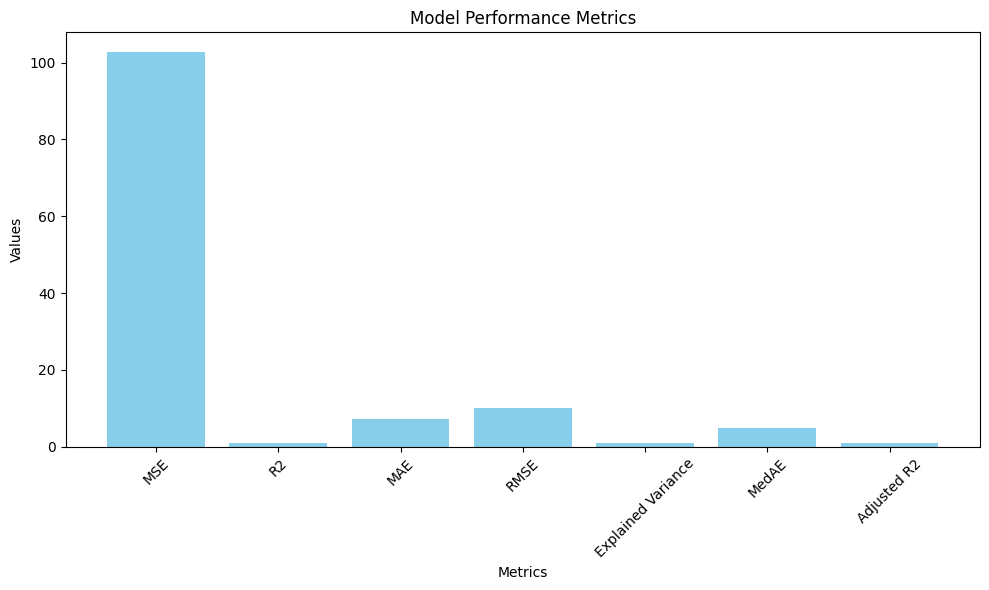

In [30]:
import matplotlib.pyplot as plt

metrics_names = ['MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance', 'MedAE', 'Adjusted R2']
metrics_values = [mse, r2, mae, rmse, evs, medae, r2_adj]

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

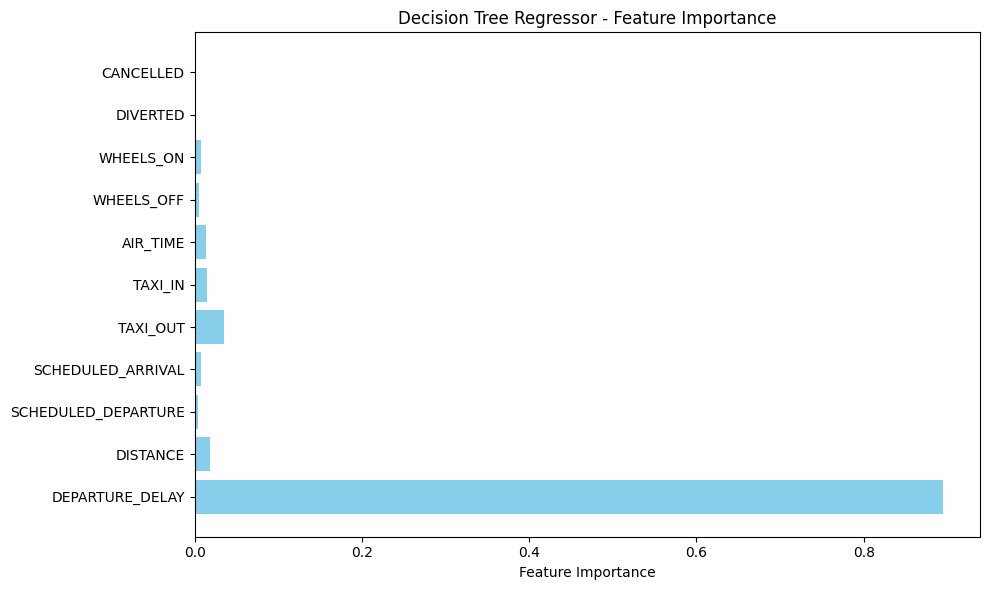

In [26]:
feature_importance = model.feature_importances_
feature_names = ['DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
                 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'DIVERTED', 'CANCELLED']

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Regressor - Feature Importance')
plt.tight_layout()
plt.show()

In [19]:
from joblib import dump

model_filename = 'C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Airplanes Project\\arrival_delay_prediction_model.joblib'
dump(model, model_filename)

['C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Airplanes Project\\arrival_delay_prediction_model.joblib']

In [24]:
import pandas as pd
from joblib import load

# Creating a sample DataFrame similar to the features used in the model
# Replace these values with your actual data for prediction
data = {
    'DEPARTURE_DELAY': [-5.0, 15.0, 10.0],
    'DISTANCE': [1000, 1200, 800],
    'SCHEDULED_DEPARTURE': [1200, 1400, 900],
    'SCHEDULED_ARRIVAL': [1700, 1900, 1040],
    'TAXI_OUT': [20.0, 18.0, 22.0],
    'TAXI_IN': [5.0, 7.0, 5.0],
    'AIR_TIME': [150.0, 170.0, 120.0],
    'WHEELS_OFF': [1235.0, 1433.0, 932.0],
    'WHEELS_ON': [1630.0, 1845.0, 1220.0],
    'DIVERTED': [0, 1, 0],
    'CANCELLED': [0, 1, 0]
}

# Creating a DataFrame from the provided data
X_new = pd.DataFrame(data)

# Load the saved model
loaded_model = load('C:\\Users\\OMOLP094\\Desktop\\Research Projects\\Airplanes Project\\arrival_delay_prediction_model.joblib')

# Predict arrival delays using the loaded model
predicted_arrival_delays = loaded_model.predict(X_new)

print(predicted_arrival_delays)

[-8. 17. 15.]


The values -8, 17, and 15 for arrival delay represent the difference in minutes between the scheduled arrival time and the actual arrival time of a flight.

A negative value (-8) suggests that the flight arrived earlier than scheduled by 8 minutes.
A positive value (17, 15) indicates that the flight arrived later than the scheduled time by 17 and 15 minutes, respectively.

These values measure the punctuality or delay of a flight compared to its scheduled arrival time.